# 00. 라이브러리 불러오기

In [25]:
from importlib.metadata import version
import nltk
import tensorflow
import summa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ModelCheckpoint

print(nltk.__version__)
print(tensorflow.__version__)
print(pd.__version__)
print(version('summa'))

3.6.5
2.6.0
1.3.3
1.2.0


In [19]:
!pip install contractions
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import contractions 

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

     |████████████████████████████████| 289 kB 6.0 MB/s            
     |████████████████████████████████| 103 kB 68.2 MB/s            


[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /aiffel/nltk_data...
[nltk_data] Downloading package omw-1.4 to /aiffel/nltk_data...


True

# 01. 데이터 수집하기

In [2]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [5]:
data.sample(20)

,headlines,text
30768,Can't make laws for arrest without fair proced...,The Supreme Court on Wednesday observed that n...
50330,Couple visits 23 nations in plane they built t...,A retired couple visited 23 countries in a fou...
25003,Not ok with firing of 'Guardians of...' maker:...,"Dave Bautista, who plays 'Drax the Destroyer' ..."
2709,Man shoots at 10-year-old girl when she asks i...,A man was arrested on Wednesday in Uttar Prade...
95102,Tunisian nightclub shut after DJ plays Muslim ...,A nightclub in Tunisia has been shut down afte...
70353,Trump a symptom of short attention spans: Twit...,Twitter Co-founder Evan Williams has said that...
83824,Kavita Devi first Indian woman wrestler to com...,Former powerlifter Kavita Devi will become the...
54021,France mulls developing trade 'backbone' with ...,"France aims to develop a trade ""backbone"" with..."
56117,SA bowler picks all-bowled hat-trick in Women'...,South African spinner Dane van Niekerk picked ...
74459,SL need 2 wins against India for direct place ...,Sri Lanka can directly qualify for 2019 World ...


# 02. 데이터 전처리

## 02-1. 중복 제거

In [7]:
print('Text 열에서 중복을 배제한 유일한 샘플의 수 :', data['text'].nunique())
print('headlines 열에서 중복을 배제한 유일한 샘플의 수 :', data['headlines'].nunique())

Text 열에서 중복을 배제한 유일한 샘플의 수 : 98360
headlines 열에서 중복을 배제한 유일한 샘플의 수 : 98280


In [11]:
# inplace=True 를 설정하면 DataFrame 타입 값을 return 하지 않고 data 내부를 직접적으로 바꿉니다
data.drop_duplicates(subset = ['text'], inplace=True)
print('전체 샘플수 :', (len(data)))
print(data.isnull().sum())

전체 샘플수 : 98360
headlines    0
text         0
dtype: int64


## 02-2. 약어 정의

In [14]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

## 02-3. 불용어 확인

In [15]:
print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

## 02-4. 전처리 함수 정의 
### 다양한 제거법 레퍼런스 활용해 함수화하여 적용함

In [20]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower()  # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text  # HTML 태그 제거
    sentence = contractions.fix(sentence)  # 약어 수정
    sentence = re.sub(r'\([^)]*\)', '', sentence)  # 괄호로 닫힌 문자열 제거
    sentence = re.sub('"', '', sentence)  # 쌍따옴표 제거
    sentence = re.sub(r'http\S+|www.\S+', '', sentence)  # URL 제거
    sentence = re.sub(r'\S+@\S+', '', sentence)  # 이메일 주소 제거
    sentence = re.sub(r"'s\b", "", sentence)  # 소유격 제거
    sentence = re.sub("[^a-zA-Z]", " ", sentence)  # 알파벳 외 문자 공백으로 변환
    sentence = re.sub(r'\s+', ' ', sentence).strip()  # 불필요한 공백 제거
    sentence = re.sub('[m]{2,}', 'mm', sentence)  # 반복되는 'm' 문자 수정

    # 어간 추출을 위한 초기화
    lemmatizer = WordNetLemmatizer()

    # 불용어 제거 및 어간 추출
    if remove_stopwords:
        tokens = ' '.join(
            lemmatizer.lemmatize(word) for word in sentence.split()
            if word not in stopwords.words('english') and len(word) > 1
        )
    else:
        tokens = ' '.join(
            lemmatizer.lemmatize(word) for word in sentence.split() if len(word) > 1
        )
    return tokens

## 02-5 전처리 수행 
### 너무 오래걸림 ㅠㅠ

In [21]:
# 전체 Text 데이터에 대한 전처리 : 10분 이상 시간이 걸릴 수 있습니다. 
clean_text = []

clean_text = data['text'].apply(preprocess_sentence)
# 전처리 후 출력
print("text 전처리 후 결과: ", clean_text[:5])

Text 전처리 후 결과:  0    saurav kant alumnus upgrad iiit pg program mac...
1    kunal shah credit card bill payment platform c...
2    new zealand defeated india wicket fourth odi h...
3    aegon life iterm insurance plan customer enjoy...
4    speaking sexual harassment allegation rajkumar...
Name: text, dtype: object


In [26]:
# 전체 Summary 데이터에 대한 전처리 : 5분 이상 시간이 걸릴 수 있습니다. 
clean_headlines = []

clean_headlines = data['headlines'].apply(lambda x: preprocess_sentence(x,False))

print("headlines 전처리 후 결과: ", clean_headlines[:5])

headlines 전처리 후 결과:  0    upgrad learner switch to career in ml al with ...
1    delhi techie win free food from swiggy for one...
2    new zealand end rohit sharma led india match w...
3    aegon life iterm insurance plan help customer ...
4    have known hirani for yr what if metoo claim a...
Name: headlines, dtype: object


In [27]:
data['text'] = clean_text
data['headlines'] = clean_headlines

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)

## 02-6. 길이 조정 및 시작, 종료 토큰 추가

### 길이 추출 후 조정 및 sos, eos 토큰 추가

텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.09353395689305
요약의 최소 길이 : 1
요약의 최대 길이 : 16
요약의 평균 길이 : 9.253731191541277


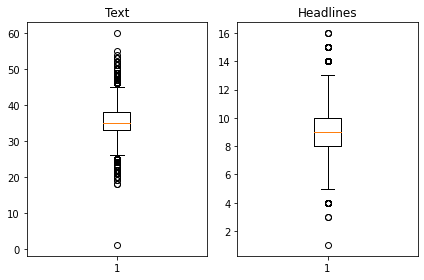

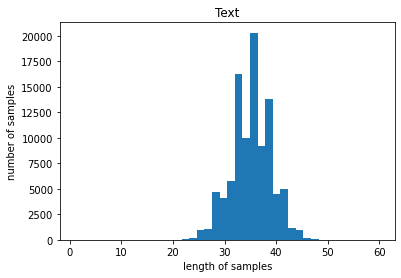

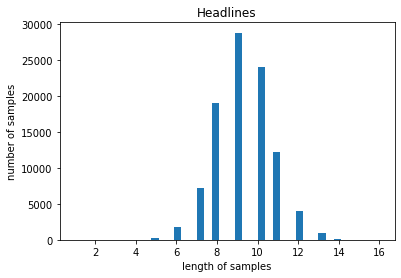

In [29]:
# 길이 분포 출력
text_len = [len(s.split()) for s in data['text']]
headline_len = [len(s.split()) for s in data['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(headline_len)))
print('요약의 최대 길이 : {}'.format(np.max(headline_len)))
print('요약의 평균 길이 : {}'.format(np.mean(headline_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(headline_len)
plt.title('Headlines')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Headlines')
plt.hist(headline_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [30]:
text_max_len = 46
headlines_max_len = 13

def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [31]:
below_threshold_len(text_max_len, data['text'])
below_threshold_len(headlines_max_len,  data['headlines'])

전체 샘플 중 길이가 46 이하인 샘플의 비율: 0.9983021553477023
전체 샘플 중 길이가 13 이하인 샘플의 비율: 0.9983834892232615


In [32]:
data = data[data.apply(lambda x: len(x['text'].split()) <= text_max_len 
                       and len(x['headlines'].split()) <= headlines_max_len, axis=1)]
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98034


In [33]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken')
data.head()

,headlines,text,decoder_input,decoder_target
0,upgrad learner switch to career in ml al with ...,saurav kant alumnus upgrad iiit pg program mac...,sostoken upgrad learner switch to career in ml...,upgrad learner switch to career in ml al with ...
1,delhi techie win free food from swiggy for one...,kunal shah credit card bill payment platform c...,sostoken delhi techie win free food from swigg...,delhi techie win free food from swiggy for one...
2,new zealand end rohit sharma led india match w...,new zealand defeated india wicket fourth odi h...,sostoken new zealand end rohit sharma led indi...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan help customer ...,aegon life iterm insurance plan customer enjoy...,sostoken aegon life iterm insurance plan help ...,aegon life iterm insurance plan help customer ...
4,have known hirani for yr what if metoo claim a...,speaking sexual harassment allegation rajkumar...,sostoken have known hirani for yr what if meto...,have known hirani for yr what if metoo claim a...


## 02-7. 학습, 검증, 테스트 데이터 분리

In [34]:
encoder_input = np.array(data['text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블

In [37]:
# train_test_split 직접 구현 코드
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 19606


In [38]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

## 02-8. 토큰화 및 패딩 적용

In [39]:
src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성

In [43]:
threshold = 4
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 63185
등장 빈도가 3번 이하인 희귀 단어의 수: 36816
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 26369
단어 집합에서 희귀 단어의 비율: 58.26699374851626
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.0122401032261066


In [45]:
src_vocab = 26300
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 26,300으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성

# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

In [46]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [47]:
threshold = 3
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 26370
등장 빈도가 2번 이하인 희귀 단어의 수: 12737
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 13633
단어 집합에서 희귀 단어의 비율: 48.30109973454683
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.0100064826877397


In [48]:
tar_vocab = 13600
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

In [51]:
# 패딩 적용
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='pre')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='pre')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=headlines_max_len, padding='pre')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=headlines_max_len, padding='pre')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=headlines_max_len, padding='pre')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=headlines_max_len, padding='pre')

# 03. 어텐션 활용한 모델 설계

In [52]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.2)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
# [[YOUR CODE]]
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.2)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1, initial_state=[state_h1, state_c1])

# 인코더의 LSTM 3
# [[YOUR CODE]]
encoder_lstm3 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.2)
encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output2, initial_state=[state_h2, state_c2])

In [53]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

In [54]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 46)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 46, 128)      3366400     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 46, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

## 03-2. 모델 실행

In [55]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_split=0.2, batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
246/246 [==============================] - 35s 116ms/step - loss: 5.4344 - val_loss: 5.1479
Epoch 2/50
246/246 [==============================] - 28s 114ms/step - loss: 5.0726 - val_loss: 5.3457
Epoch 3/50
246/246 [==============================] - 29s 118ms/step - loss: 4.9684 - val_loss: 4.8991
Epoch 4/50
246/246 [==============================] - 29s 119ms/step - loss: 4.7656 - val_loss: 4.7248
Epoch 5/50
246/246 [==============================] - 30s 121ms/step - loss: 4.5925 - val_loss: 4.6009
Epoch 6/50
246/246 [==============================] - 30s 120ms/step - loss: 4.4286 - val_loss: 4.4933
Epoch 7/50
246/246 [==============================] - 30s 120ms/step - loss: 4.2737 - val_loss: 4.3472
Epoch 8/50
246/246 [==============================] - 30s 120ms/step - loss: 3.8437 - val_loss: 4.0779
Epoch 11/50
246/246 [==============================] - 30s 120ms/step - loss: 3.7312 - val_loss: 4.0138
Epoch 12/50
246/246 [==============================] - 30s 120ms/step - 

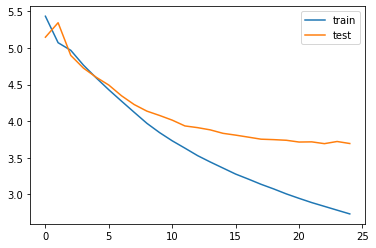

In [56]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
"""
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

# EarlyStopping 콜백 설정
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

# ModelCheckpoint 콜백 설정
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

# 모델 학습
history = model.fit(x=[encoder_input_train, decoder_input_train],
                    y=decoder_target_train,
                    validation_split=0.2,
                    batch_size=64,
                    callbacks=[es, mc],
                    epochs=50)
"""

In [ ]:
from keras.models import load_model

model = load_model('best_model.h5')

## 03-3. 인퍼런스 모델 구현

In [60]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

In [61]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [62]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])


In [63]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (headlines_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp = ''
    for i in input_seq:
        if (i != 0) and (tar_index_to_word[i] != 'sostoken') and (tar_index_to_word[i] != 'eostoken'):
            temp += tar_index_to_word[i] + ' '
    return temp.strip()

# 04. 실제 결과와 요약문 비교하기

In [70]:
# 19개의 원문 요약과 예측 요약을 비교
for i in range(len(encoder_input_test)//100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : indian woman football team tuesday qualified olympic qualifier second round first time indian woman team advanced second round finishing second group four point three match behind table topper myanmar second round olympic qualifier played april next year 
실제 요약 : india woman soccer team in olympic qualifier nd rd for st time
예측 요약 :  team india lose to win in st round of pro in yr


원문 : helicopter crash leicester city owner vichai srivaddhanaprabha four others killed caused pedal controlling tail rotor became disconnected investigator said aircraft turned uncontrollably right crashing near team stadium helicopter agustawestland made four successful flight october last ascent 
실제 요약 : faulty chopper caused crash that killed leicester city owner
예측 요약 :  dead in crash in crash in crash in crash in crash crash


원문 : actor akshay kumar said endorsing harmful product service incorrect think audience also must understand follow follow added urged celebrity endorse harmful service prod

In [103]:
# 실제 요약문과 예측 요약문을 저장할 리스트 초기화
actual_summaries = []
predicted_summaries = []

# 테스트 데이터셋의 크기
num_samples = len(encoder_input_test)

for i in range(500):
    # 원문 (필요에 따라 사용)
    original_text = seq2text(encoder_input_test[i])

    # 실제 요약문
    actual_summary = seq2summary(decoder_input_test[i])

    # 예측 요약문
    predicted_summary = decode_sequence(encoder_input_test[i].reshape(1, text_max_len))

    # 리스트에 추가
    actual_summaries.append(actual_summary)
    predicted_summaries.append(predicted_summary)

# **04-2. ROUGE 평가지표

In [104]:
!pip install rouge

from rouge import Rouge

In [105]:
# Rouge 객체 생성
rouge = Rouge()

# 실제 요약문과 예측 요약문 리스트가 준비되었는지 확인
print(f"실제 요약문 수: {len(actual_summaries)}")
print(f"예측 요약문 수: {len(predicted_summaries)}")

# 빈 문자열이나 None 값이 있는지 확인하고 제거 (선택 사항)
actual_summaries = [summary if summary else '' for summary in actual_summaries]
predicted_summaries = [summary if summary else '' for summary in predicted_summaries]

# ROUGE 점수 계산
scores = rouge.get_scores(predicted_summaries, actual_summaries, avg=True)

# 결과 출력
print("ROUGE-1:", scores['rouge-1'])
print("ROUGE-2:", scores['rouge-2'])
print("ROUGE-L:", scores['rouge-l'])

실제 요약문 수: 500
예측 요약문 수: 500
ROUGE-1: {'r': 0.1992120102120105, 'p': 0.1878216450216453, 'f': 0.19017557999881046}
ROUGE-2: {'r': 0.03334747474747473, 'p': 0.02622330447330449, 'f': 0.028960390431611676}
ROUGE-L: {'r': 0.18031970806970823, 'p': 0.17009862914862947, 'f': 0.17214923895826834}


### ROUGE-1: 단어 단위(유니그램)에서 실제 요약문과 예측 요약문 간의 겹침을 평가
### ROUGE-2: 이웃하는 두 단어(바이그램)의 겹침을 평가
### ROUGE-L: 실제 요약문과 예측 요약문 간의 최장 공통 부분 수열(LCS)을 기반으로 평가

#### r = Recall -> 실제 요약문에서 얼마나 많은 단어를 예측 요약문에서 회수했는지
#### p = Precision -> 예측 요약문에서 실제 요약문과 일치하는 단어가 얼마나 포함되었는지
#### f = f1-score -> Recall과 Precision의 조화 평균

### 결과가 낮게 나온 이유는 우선 500개의 요약문만 평가했기 때문이며, 추가적으로 생성형인 추상적 요약인 이유와 임베딩이 유사 단어 수준이 효율적이지 않기 때문이라 판단한다. 

# 05. Summa를 이용하여 추출적 요약 수행

In [71]:
import requests
from summa.summarizer import summarize

In [73]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [81]:
texts = data.loc[0:196, 'text']

In [94]:
# 예외 처리를 위한 함수 정의
def summarize_safe(text, **kwargs):
    try:
        return summarize(text, **kwargs)
    except ValueError:
        return ''

# 데이터프레임에서 0번부터 196번까지의 행 선택
subset_data = data.loc[0:196].copy()

# 'summary_ratio' 열 생성
subset_data['summary_ratio'] = subset_data['text'].apply(
    lambda x: summarize_safe(x, ratio=0.4)
)

# 'summary_words' 열 생성
subset_data['summary_words'] = subset_data['text'].apply(
    lambda x: summarize_safe(x, words=16)
)

In [106]:
for i in range(len(encoder_input_test)//1000):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("sum ratio 요약 :", subset_data['summary_ratio'][i])
    print("sum word 요약 :", subset_data['summary_words'][i])
    print("\n")

원문 : indian woman football team tuesday qualified olympic qualifier second round first time indian woman team advanced second round finishing second group four point three match behind table topper myanmar second round olympic qualifier played april next year 
실제 요약 : india woman soccer team in olympic qualifier nd rd for st time
예측 요약 :  team india lose to win in st round of pro in yr
sum ratio 요약 : upGrad's Online Power Learning has powered 3 lakh+ careers.
sum word 요약 : upGrad's Online Power Learning has powered 3 lakh+ careers.


원문 : helicopter crash leicester city owner vichai srivaddhanaprabha four others killed caused pedal controlling tail rotor became disconnected investigator said aircraft turned uncontrollably right crashing near team stadium helicopter agustawestland made four successful flight october last ascent 
실제 요약 : faulty chopper caused crash that killed leicester city owner
예측 요약 :  dead in crash in crash in crash in crash in crash crash
sum ratio 요약 : Users get o

## 추가적으로 진행해본 것

###  - early stopping만 사용할 시 patient 값의 따라 최적화 이후 모델이 사용되므로, model check point callback을 사용하여 최적의 모델 저장 -> 코드 작성은 완료하였으나 적용하기에는 시간 부족ㅜ 

###  - 약간의 파라미터 수정

###  - ROUGE 평가지표 사용 - 시간 부족으로 500개만 비교

### 회고

### 여러가지 모델을 통해 실험을 해보고 싶었지만,, 코드 설계와 모델 구축 뿐만 아니라 학습과정에서의 시간 소요가 너무 오래걸리는 것이 아쉽다.. 단어 임베딩 모델을 가져와서 좋은 성능을 보여주고 싶었는데...ㅠㅠ 애초에 전처리, re 정규화 과정에서의 시간소요가 오래드는 것을 확인해보니 역시나 자연어는 건드릴 엄두조차 나지 않는다.. 쉽지 않다..